Packages

conda install nltk

conda install gensim

conda install bookeh

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import * # Porter Stemmer

import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pandas

from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure

%matplotlib inline

Project Gutenberg: Books

In [2]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')
# Titles
gutenberg.fileids()


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\mannl\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
len(gutenberg.words())

2621613

In [4]:
#Tokenize sentences
gberg_sent_tokens = sent_tokenize(gutenberg.raw())
len(gberg_sent_tokens)

94428

In [5]:
 gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

Tokenize Words

In [6]:
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

Tokenize sentences and words at te same time

In [7]:
gberg_sents = gutenberg.sents()
gberg_sents[4]


['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [8]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

Stop words

In [9]:
nltk.download('stopwords')
stopwords  
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mannl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<WordListCorpusReader in 'C:\\Users\\mannl\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [10]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [11]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
stpwords = stopwords.words('english') + list(string.punctuation)
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwords]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

Stemming

Using Porter algorithm

Not usually necessary for a large corpus in which we may prefere to handle words differently (singular vs plural for example)

In [14]:
stemmer = nltk.stem.PorterStemmer()
[stemmer.stem(w.lower()) for  w in gberg_sents[4] if w not in stpwords]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

N-grams
Ex New York as one word 'New York'

In [15]:
phrases = Phrases(gberg_sents)
bigram = Phraser(phrases)

In [16]:
bigram.phrasegrams

xtremely', b'sorry'): 73.46994297481388,
 (b'Every', b'thing'): 22.46842755413457,
 (b'many', b'weeks'): 20.757955155746508,
 (b'Am', b'I'): 15.552098209854075,
 (b'madam', b',"'): 15.249039878189363,
 (b'extremely', b'well'): 29.947748184019368,
 (b'!--', b'Such'): 19.885431136492258,
 (b'poor', b'Harriet'): 12.145847347359634,
 (b'-', b'headed'): 37.268308851224106,
 (b'an', b'instant'): 43.261013866434524,
 (b'thirty', b'thousand'): 42.25608127995964,
 (b'so', b'easily'): 10.348707172705279,
 (b'worth', b'having'): 21.664774916798038,
 (b'poor', b'girl'): 16.40337746734157,
 (b'laugh', b'at'): 11.791126449054302,
 (b'knowing', b'what'): 15.75053166426834,
 (b'many', b'days'): 14.230254790394108,
 (b'whole', b'party'): 21.733756466486728,
 (b'six', b'weeks'): 18.23820337383508,
 (b'too', b'late'): 87.81454226528567,
 (b'-', b'minded'): 20.81474696477942,
 (b'her', b'companions'): 11.854581263120794,
 (b'drew', b'near'): 135.39134997206745,
 (b'three', b'months'): 82.38692831354994,
 

In [17]:
tokenized_sentence = "Adam lives in New York City".split()
tokenized_sentence

['Adam', 'lives', 'in', 'New', 'York', 'City']

In [18]:
bigram[tokenized_sentence]

['Adam', 'lives', 'in', 'New_York', 'City']

In [19]:
tokenized_sentence = "Adam watches a rising sun when the sun is at its most high position.".split()
bigram[tokenized_sentence]

['Adam',
 'watches',
 'a',
 'rising_sun',
 'when',
 'the',
 'sun',
 'is',
 'at',
 'its',
 'most',
 'high',
 'position.']

In [20]:
# trigrams
phrases3 = Phrases(bigram[gberg_sents])
trigram = Phraser(phrases3)

In [21]:
trigram.phrasegrams

at_you'): 16.02635075556808,
 (b'ever', b'seen'): 10.5721423691383,
 (b',_I', b'suppose'): 101.73837388608436,
 (b'I', b'suppose_,'): 104.65968915064887,
 (b'does', b'not'): 26.66534718734304,
 (b'He_does', b'not'): 15.188029465930018,
 (b'"', b'Oh'): 75.1319406562986,
 (b'"', b'Oh_yes'): 52.6382639221318,
 (b'"_Oh', b'yes'): 24.940826612903226,
 (b'any', b'thing_of'): 169.30151398511677,
 (b'very', b'entertaining'): 34.88067671160455,
 (b'soon', b'as'): 16.06394445903384,
 (b'as', b'soon_as'): 45.51649265826329,
 (b'as_soon', b'as'): 1302.9096023427867,
 (b'"', b'What'): 11.401210306502007,
 (b'"', b'Oh_!'): 63.414601418001304,
 (b'"_Oh', b'!'): 38.537615065572865,
 (b'have', b'seen'): 23.94594709940406,
 (b'have', b'seen_him'): 17.201055890500243,
 (b'on', b'horseback'): 1327.167211465929,
 (b'their', b'families'): 82.31152142723474,
 (b'It', b'is_not'): 47.168547686276476,
 (b'no', b'doubt'): 85.72133091113263,
 (b'have', b'no_doubt'): 17.458336640999182,
 (b'have_no', b'doubt'): 26

Process all the Corpus

In [22]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower() not in list(string.punctuation)])

In [23]:
lower_sents[0]

['emma', 'by', 'jane', 'austen', '1816']

In [24]:
min_count = 32 # minimum count for a bigram 
threshold = 64 # score threshold 
lower_bigram = Phraser(Phrases(lower_sents, min_count = min_count, threshold = threshold))

In [25]:
lower_bigram.phrasegrams

{(b'miss', b'taylor'): 156.44059469941823,
 (b'mr', b'woodhouse'): 82.04651843976633,
 (b'mr', b'weston'): 75.87438262077481,
 (b'mrs', b'weston'): 160.68485093258923,
 (b'great', b'deal'): 93.36368125424357,
 (b'mr', b'knightley'): 161.74131790625913,
 (b'miss', b'woodhouse'): 229.03802722366902,
 (b'years', b'ago'): 74.31594785893046,
 (b'mr', b'elton'): 121.3990121932397,
 (b'dare', b'say'): 89.94000515807346,
 (b'frank', b'churchill'): 1316.4456593286038,
 (b'miss', b'bates'): 276.39588291692513,
 (b'drawing', b'room'): 84.91494947493561,
 (b'mrs', b'goddard'): 143.57843432545658,
 (b'miss', b'smith'): 73.03442128232508,
 (b'few', b'minutes'): 204.16834974753786,
 (b'john', b'knightley'): 83.03755747111268,
 (b'don', b't'): 250.30957446808512,
 (b'good', b'natured'): 88.69936184891343,
 (b'few', b'moments'): 107.77584531675087,
 (b'thousand', b'pounds'): 166.51834523092802,
 (b'o', b'clock'): 89.14789088153573,
 (b'jane', b'fairfax'): 654.5565917587609,
 (b'miss', b'fairfax'): 196.

In [26]:
lower_bigram[lower_sents[3]]

['emma',
 'woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her']

In [27]:
# Clean corpus that includes bigrams
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [28]:
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

Word2vector

In [29]:
model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, iter=5, min_count=10, workers=2)
model.corpus_count

98552

In [30]:
model.save("word2vec.model")

In [31]:
model.train(sentences=clean_sents, total_examples=model.corpus_count, epochs=10, )

(15624948, 22148410)

In [33]:
len(model.wv.vocab)

10329

In [34]:
model.save("word2vec_trained.model")
model.wv["dog"].size

64

In [35]:
model.wv["dog"]

array([ 0.28255606, -0.07398945, -0.60592055,  0.4007683 ,  0.13247363,
        0.5158377 , -0.10912964,  0.24760978,  0.2757281 , -0.6861298 ,
        0.03544242, -0.05147628,  0.00641899, -0.11376292, -0.15628377,
       -0.01426301, -0.24045579, -0.3375949 , -0.6368421 , -0.5015572 ,
       -0.09706534,  0.08470819, -0.27213448, -0.76243675, -0.46876118,
       -0.1952208 ,  0.10638123,  0.16497768,  0.01229161,  0.39222285,
        0.14638165,  0.08978623,  0.3433043 , -0.39286363, -0.01436704,
        0.06853222, -0.03922777, -0.11764683, -0.70410085,  0.3276486 ,
        0.73627794, -0.62771577,  0.04261276, -0.29231605, -0.25727633,
       -0.4967857 , -0.7068569 ,  0.03509477,  0.112704  , -0.20646311,
       -0.06770957, -0.5403139 , -0.40102315,  0.20495483,  0.03640425,
        0.19702859,  0.18350603,  0.27231175,  0.04683866,  0.04484287,
        0.08425854, -0.28276312, -0.51544225,  0.43017206], dtype=float32)

In [36]:
model.wv.most_similar("father", topn=4)

[('mother', 0.8269747495651245),
 ('brother', 0.7295180559158325),
 ('wife', 0.7013764381408691),
 ('sister', 0.6812744140625)]

In [37]:
model.wv.most_similar("flower", topn=4)

[('trees', 0.6777347326278687),
 ('blossom', 0.6679322719573975),
 ('flowers', 0.6643365621566772),
 ('vine', 0.6554334163665771)]

In [38]:
model.wv.most_similar("man", topn=4)

[('sort', 0.6914438009262085),
 ('one', 0.6791810989379883),
 ('he', 0.6745891571044922),
 ('philosopher', 0.6708056926727295)]

In [39]:
model.wv.most_similar("woman", topn=4)

[('child', 0.7356604933738708),
 ('husband', 0.7126075625419617),
 ('person', 0.6595746278762817),
 ('girl', 0.6508253812789917)]

In [40]:
model.wv.doesnt_match("mother father siter brother dog".split())

'dog'

In [41]:
model.wv.similarity('father', 'dog')

0.3982286

In [42]:
model.wv.most_similar("dog", topn=4)

[('pet', 0.7033544182777405),
 ('puppy', 0.6263236999511719),
 ('cow', 0.6081209182739258),
 ('pigeon', 0.5909411311149597)]

In [43]:
model.wv.most_similar(positive=["father", "woman"], negative=["man"])

[('mother', 0.766939640045166),
 ('husband', 0.7269443869590759),
 ('wife', 0.7151706218719482),
 ('sister', 0.7107871174812317),
 ('daughter', 0.6911709904670715),
 ('daughters', 0.6454722881317139),
 ('concubine', 0.6400172114372253),
 ('brother', 0.6394221782684326),
 ('tamar', 0.6347125768661499),
 ('sarai', 0.6002691388130188)]

In [44]:
model.wv.most_similar(positive=["husband", "woman"], negative=["man"])

[('wife', 0.6996876001358032),
 ('sister', 0.6769925951957703),
 ('mother', 0.6564623117446899),
 ('maid', 0.6314009428024292),
 ('daughter', 0.6305713653564453),
 ('daughters', 0.5894195437431335),
 ('child', 0.5795385241508484),
 ('chaste', 0.5725845098495483),
 ('whore', 0.5544799566268921),
 ('widow', 0.5538582801818848)]

In [45]:
model.wv.most_similar(positive=["man", "dog"], negative=["bark"])

[('fellow', 0.5604697465896606),
 ('thing', 0.5480461120605469),
 ('woman', 0.5184997320175171),
 ('boy', 0.5040338039398193),
 ('hypocrite', 0.49575138092041016),
 ('sweepstakes', 0.494401216506958),
 ('lad', 0.4904244542121887),
 ('landlord', 0.4873100519180298),
 ('steward', 0.487196147441864),
 ('person', 0.4835916757583618)]

Plotting Word Vectors 

Example: 2 dimensions

TSNE

In [49]:
tsne = TSNE(n_components=2, n_iter=1000)

In [50]:
X_2D = tsne.fit_transform(model.wv[model.wv.vocab])

In [60]:
import pandas as pd
coords_df = pd.DataFrame(X_2D, columns=['x', 'y'])

In [61]:
coords_df['token'] = model.wv.vocab.keys()

In [62]:
coords_df.head()

,x,y,token
0,58.759659,1.031470,emma
1,11.023505,-5.825167,by
2,57.774769,0.400734,jane
3,21.229288,-6.510026,volume
4,6.067934,27.824804,i


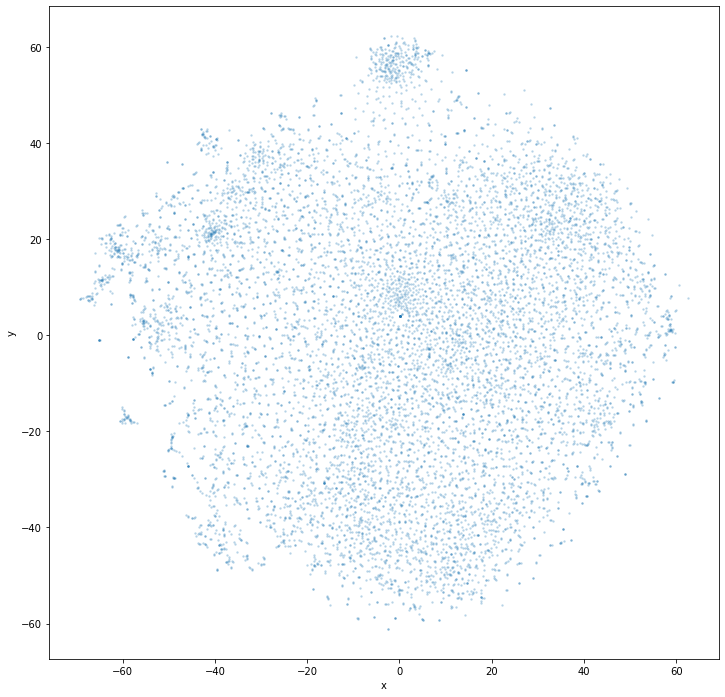

In [63]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12, 12), marker='.', s=10, alpha=0.2)

In [65]:
coords_df.tail()

,x,y,token
10324,-15.406234,-29.708387,brooklyn
10325,-11.721594,-12.324832,growths
10326,-12.444099,-21.569044,bugles
10327,-10.432865,-23.024464,myriad
10328,-8.914931,-21.773491,vigil


View using bokeh library


In [89]:
output_notebook()
subset_df = coords_df.sample(n=100)
subset_df


Loading BokehJS ...

,x,y,token
1043,-38.189003,-28.538931,cake
8033,-30.551367,21.769161,decreed
1401,50.199074,27.537144,encouraged
3987,41.321354,26.639959,emotion
7730,-27.104084,-19.009008,whelps
...,...,...,...
2575,-58.778461,-4.483218,abode
2942,-5.515798,-21.472841,hoarse
3766,26.782377,38.787754,willingly
1356,34.366604,16.804083,foreseen


In [90]:
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [91]:
coords_df

,x,y,token
0,58.759659,1.031470,emma
1,11.023505,-5.825167,by
2,57.774769,0.400734,jane
3,21.229288,-6.510026,volume
4,6.067934,27.824804,i
...,...,...,...
10324,-15.406234,-29.708387,brooklyn
10325,-11.721594,-12.324832,growths
10326,-12.444099,-21.569044,bugles
10327,-10.432865,-23.024464,myriad


In [92]:
show(p)